In [41]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Read CSV file and put it inside dataframe
df = pd.read_csv('train.csv')

In [42]:
# Show number of attributes
print(f'Number of attributes: {df.shape[1]}')

Number of attributes: 12


In [43]:
# Show names of attributes
print(f'Name of attributes: {df.columns}')

Name of attributes: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [44]:
# Show number of instances
print(f'Number of instances: {df.shape[0]}')

Number of instances: 891


In [45]:
# Show columns and top 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
# Check how many missing rows for each columns
missing_data = df.isnull().sum()

# Show only columns with missing data
print(f'{missing_data[missing_data > 0]}')

Age         177
Cabin       687
Embarked      2
dtype: int64


In [47]:
# Check for duplicates after dropping PassengerId 
df = df.drop(columns='PassengerId')
print(f'Number of duplicated rows: {df.duplicated().sum()}')

# Check columns that have more than 50% missing data
missing_proportion = df.isnull().mean()
columns_to_drop = missing_proportion[missing_proportion > 0.5]

# Drop those columns together with "Name" and "Ticket" columns
df = df.drop(columns=['Name','Ticket'] + list(columns_to_drop.index))


Number of duplicated rows: 0


In [48]:
# Create new 'Relatives' column based on number of relatives 
df['Relatives'] = df['Parch'] + df['SibSp']

df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop SibSp, Parch columns
df = df.drop(columns=['SibSp','Parch'])
print(f'Number of attributes: {df.shape[1]}')
print(f'Name of attributes: {df.columns}')

Number of attributes: 7
Name of attributes: Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Relatives'], dtype='object')


In [49]:
# Change Pclass into category datatype
df['Pclass'] = df['Pclass'].astype('category')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    category
 2   Sex        891 non-null    object  
 3   Age        891 non-null    float64 
 4   Fare       891 non-null    float64 
 5   Embarked   889 non-null    object  
 6   Relatives  891 non-null    int64   
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 42.9+ KB


,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [67]:
# Do one-hot encoding
data_encoded = pd.get_dummies(df,drop_first = True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_encoded)

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


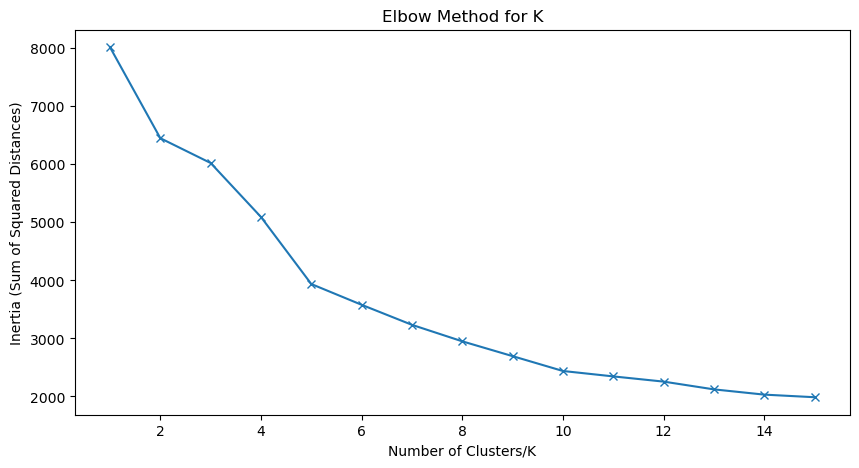

Depending on the random seed, k is usually either 7 or 8.


In [77]:
# Sum of squared distances for each k
inertia = []

# Range of k values to test 
k_values = range(1, 16)

# Perform K-Means for each k and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='x')
plt.xlabel('Number of Clusters/K')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for K')
plt.show()
print('Depending on the random seed, k is usually either 7 or 8.')